#### Visualizing Time Series Data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from utils.utils import read_dataset
import math
import seaborn as sns 



def plot_timeseries_data(samples, labels, title, hspace=0.2):
    assert len(samples) % 4 == 0


    sns.set(style="darkgrid", palette="muted")
    n_samples = len(samples)
    n_cols = 4
    n_rows = math.ceil(n_samples / n_cols)
    figsize = (20, 10)
    fig, axs = plt.subplots(n_rows, n_cols, sharex=True, figsize=figsize)

    for i in range(n_samples):
        row = i // n_cols
        col = i % n_cols
        axs[row, col].plot(samples[i].flatten(), linewidth=2)
        axs[row, col].set_title(f"Class {labels.flatten()[i]}", fontsize=12)
        axs[row, col].set_xlabel("Time", fontsize=10)
        #axs[row, col].set_ylabel("Value", fontsize=10)
        axs[row, col].tick_params(labelsize=8)

    fig.suptitle(title, fontsize=18, fontweight='bold')
    plt.subplots_adjust(hspace=hspace,wspace=0.1)
    plt.show()

x_train,y_train,x_test,y_test = read_dataset(".","ucr","GunPoint", "original", 1)["GunPoint"]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],"Sample Instances of GunPoint Dataset")


C:\Users\boent\AppData\Local\Temp\ipykernel_4692\3622739383.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


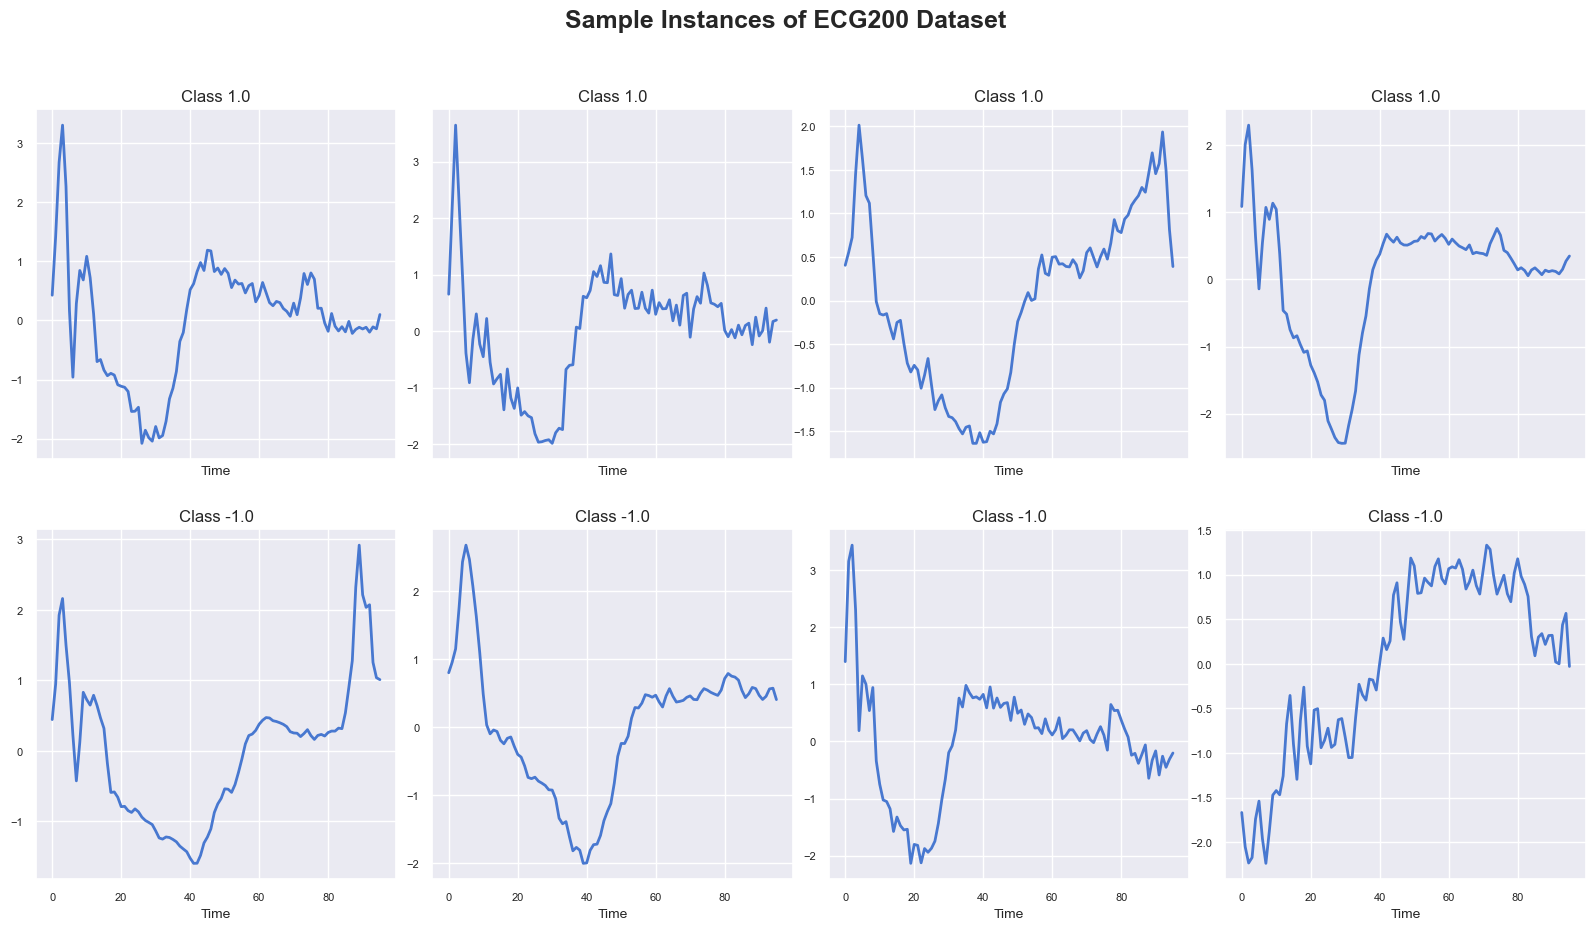

In [106]:
dataset = "ECG200"
x_train,y_train,x_test,y_test = read_dataset(".","ucr",dataset, "original", 1)[dataset]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==-1)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],f"Sample Instances of {dataset} Dataset")

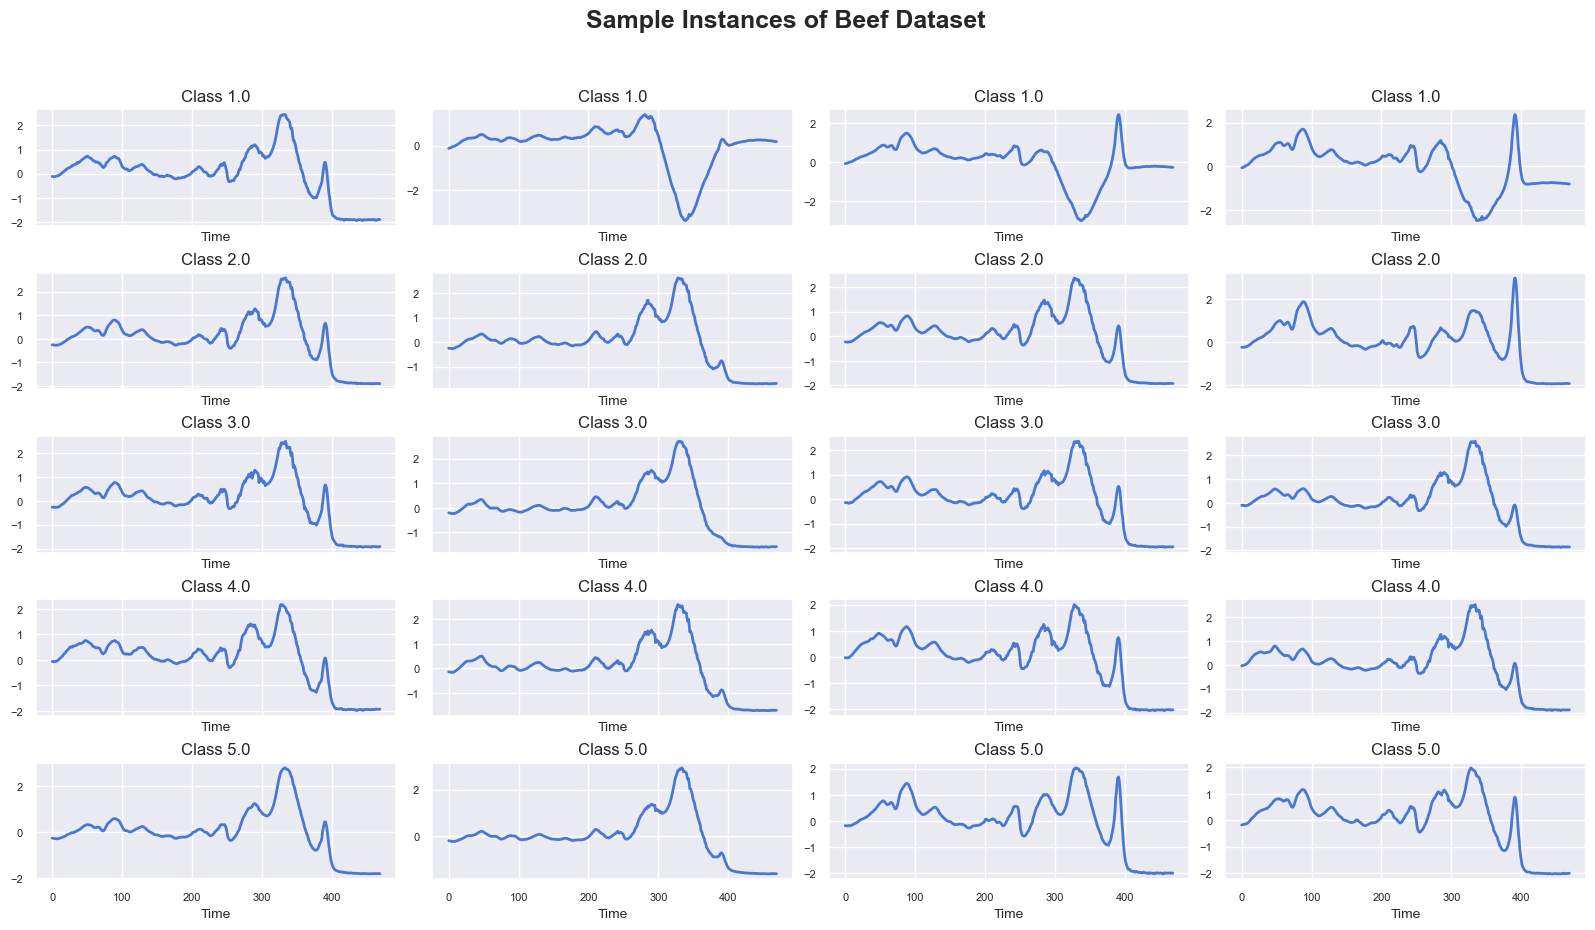

In [113]:
dataset = "Beef"
x_train,y_train,x_test,y_test = read_dataset(".","ucr",dataset, "original", 1)[dataset]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])+list(np.where(y_test.flatten()==3)[0][:4])+list(np.where(y_test.flatten()==4)[0][:4])+list(np.where(y_test.flatten()==5)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],f"Sample Instances of {dataset} Dataset",hspace=0.4)


In [2]:
%matplotlib inline


<Figure size 640x480 with 0 Axes>

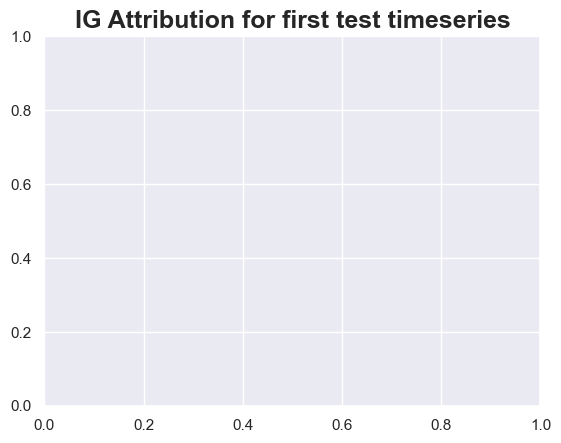

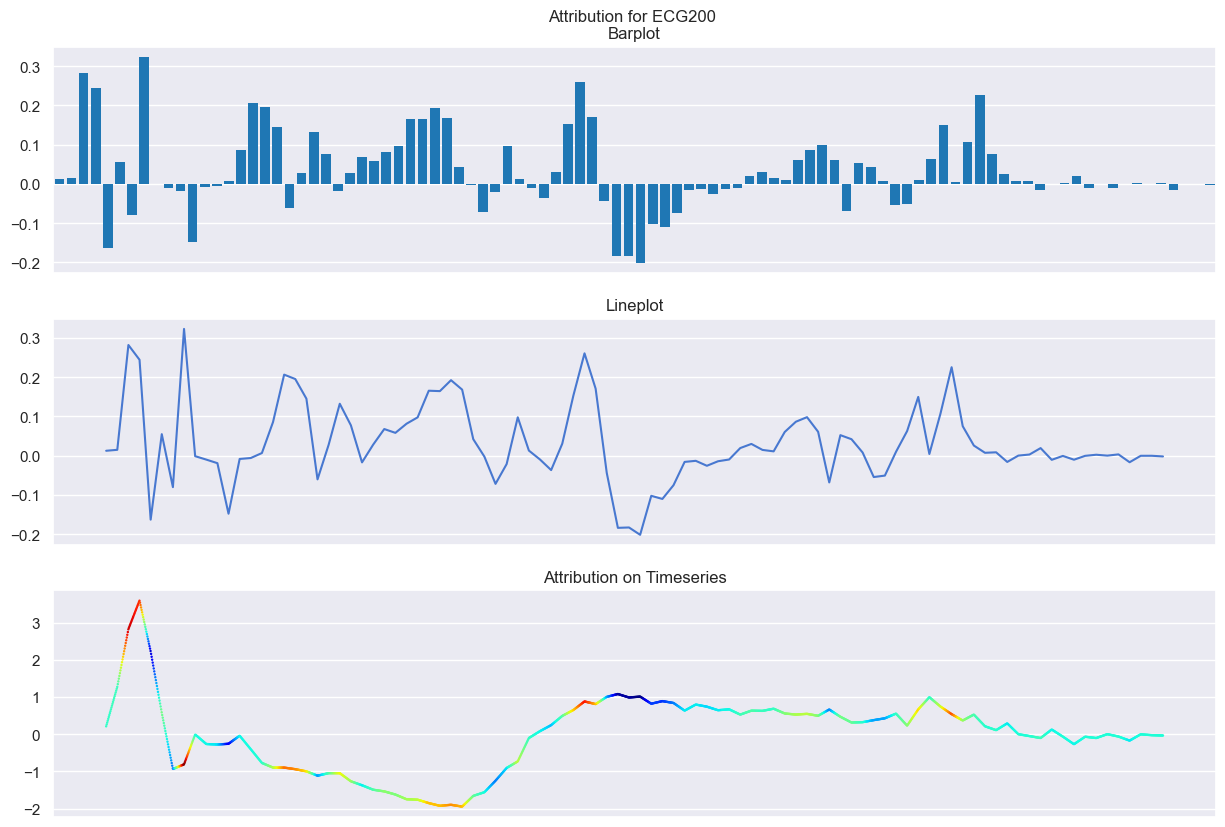

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
from utils.utils import read_dataset 
from utils.explanations import norm
import seaborn as sns
import numpy as np
#sns.set()
#sns.set_palette("husl")

from scipy.interpolate import interp1d
def prepare_visualize_attribution(ts,attribution):
    max_length = 2000    
    #prepare values
    minimum = np.min(attribution)
    cas = attribution - minimum
    cas = cas / max(cas)
    cas = cas * 100
    xv= np.linspace(0, len(ts) - 1, max_length, endpoint=True)
    f = interp1d(range(len(ts)),ts)
    yv = f(xv)
    f = interp1d(range(len(ts)),cas)
    cas = f(xv).astype(int)
    return xv,yv,cas


archive = 'ucr'
dataset = 'ECG200'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'

#palette = sns.color_palette("Spectral", as_cmap=True)

def visualize_experiment_1(dataset, model, ts, train):
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
    
    model_type = "fcn"
    ylen = 1 
    data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
    ylen = len(data[0][0])
    ig_data_stl = read_dataset(data_p, archive, dataset, f'{model_type}_ig_norm', ylen)[dataset]

    # Get x and y values for Seaborn's barplot
    x_values = np.arange(len(norm(ig_data_stl[3][ts])))
    y_values = norm(ig_data_stl[3][ts])

    # Use Seaborn's barplot for the first row
    plot_on_ts = prepare_visualize_attribution(ig_data_stl[2][ts], y_values)
    sns.barplot(x=x_values, y=y_values, ax=axes[0], linewidth=0,color = "tab:blue",saturation=1)
    #axes[0][idx].bar(x_values,y_values)
    axes[0].set_title(f'Attribution for {dataset} \nBarplot')
    axes[0].set_xticks([])

    # Line plot for the second row
    sns.lineplot(x=x_values, y=y_values, ax=axes[1])
    axes[1].set_title(f'Lineplot')
    axes[1].set_xticks([])

    # Scatter plot with colormap for the third row
    axes[2].scatter(plot_on_ts[0], plot_on_ts[1], c=plot_on_ts[2], cmap='jet', s=0.5)
    axes[2].set_title(f'Attribution on Timeseries')
    axes[2].set_xticks([])

plt.tight_layout()
plt.show()
plt.title("IG Attribution for first test timeseries", fontsize=18, fontweight='bold')

visualize_experiment_1('ECG200','fcn_mt_ae',5, train=False)

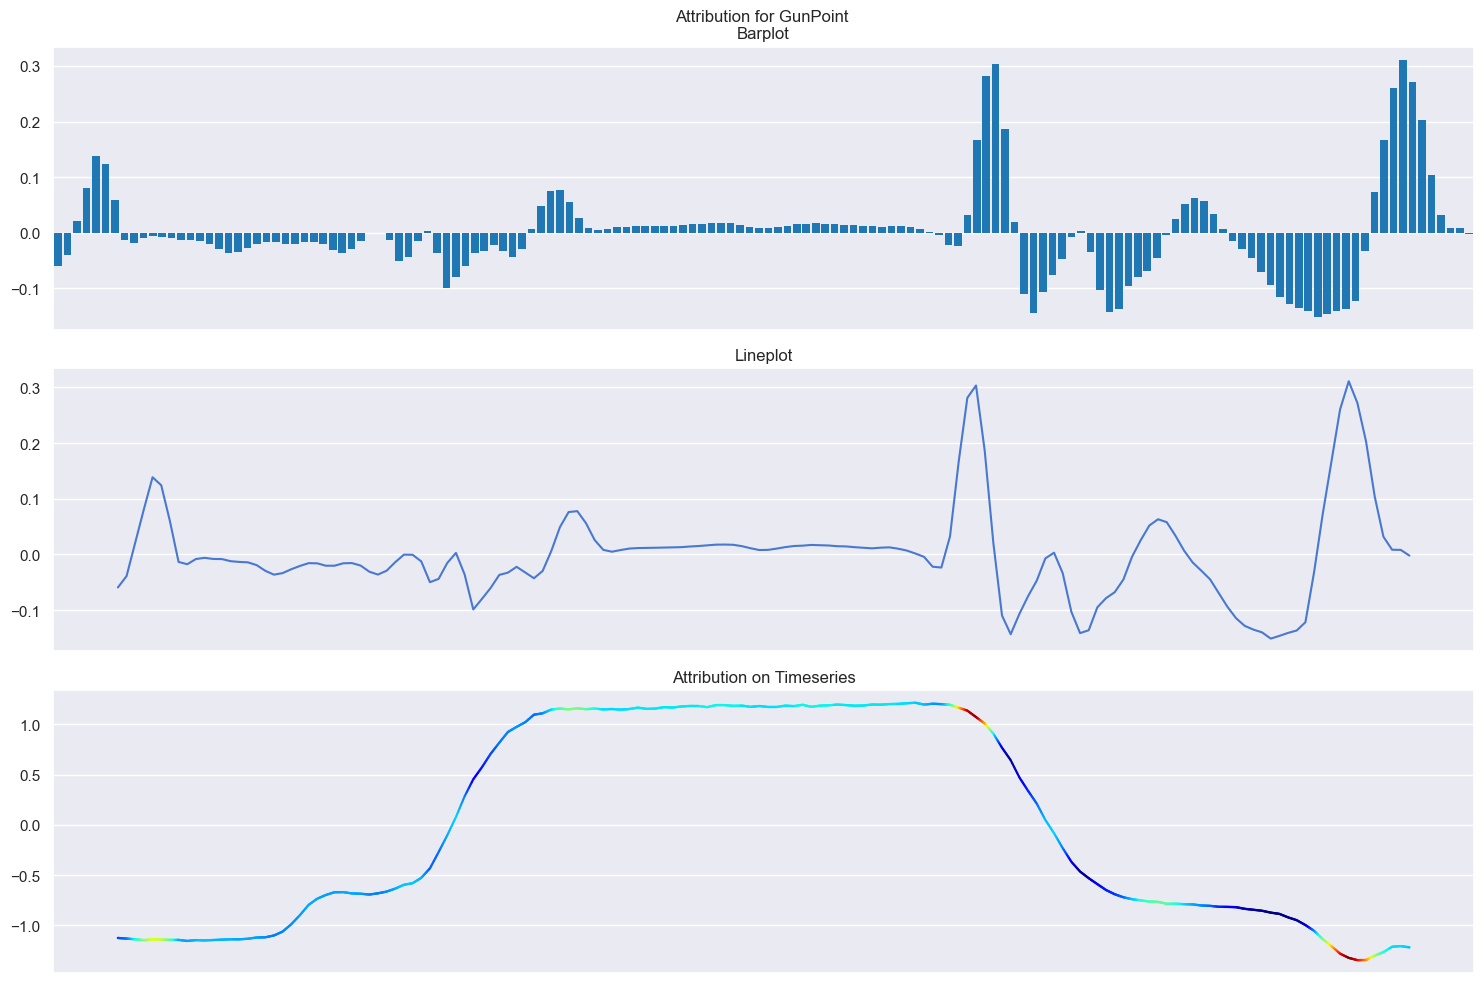

AttributeError: 'Figure' object has no attribute 'title'

In [3]:
visualize_experiment_1('ECG200','fcn_mt_ae',0, train=False)


In [17]:
import tensorflow as tf
def interpolate_series(baseline,
                       series,
                       alphas):
  alphas_x = alphas[:,tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  input_x = tf.expand_dims(series, axis=0)
  delta = tf.expand_dims((series - baseline),axis=0)
  print(delta, alpha_x)
  series = baseline_x +  alphas_x * delta
  return series

m_steps = 5
batch_size = 4
archive = 'ucr'
dataset = 'ECG200'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
ylen = 1
data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
baseline = np.zeros(96)
alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)
# Initialize TensorArray outside loop to collect gradients.    

gradient_batches = tf.TensorArray(tf.float32, size=m_steps+1)

# Iterate alphas range and batch computation for speed, memory efficiency, and scaling to larger m_steps.
for alpha in tf.range(0, len(alphas), batch_size):
    from_ = alpha
    to = tf.minimum(from_ + batch_size, len(alphas))
    alpha_batch = alphas[from_:to]
    interpolate_series(baseline, data[2][0],alpha_batch)

[ 0.42519   1.4186    2.6688    3.2986    2.2646    0.16518  -0.95973
  0.28267   0.84285   0.68346   1.0821    0.72258   0.10981  -0.69661
 -0.66227  -0.83998  -0.9353   -0.89536  -0.92427  -1.0882   -1.1136
 -1.1307   -1.2019   -1.5395   -1.5352   -1.4684   -2.078    -1.8565
 -1.9829   -2.0412   -1.7939   -1.9862   -1.9469   -1.7066   -1.3251
 -1.1471   -0.86363  -0.35602  -0.20489   0.18301   0.51805   0.61929
  0.8226    0.97678   0.84313   1.1859    1.1737    0.82464   0.88404
  0.77681   0.87503   0.79529   0.55417   0.6799    0.61355   0.62309
  0.46371   0.58588   0.62259   0.31403   0.42168   0.63939   0.47076
  0.29998   0.24745   0.31996   0.29977   0.20093   0.15237   0.069307
  0.29063   0.096217  0.37972   0.79163   0.60666   0.80154   0.69631
  0.20439   0.20512  -0.045159 -0.18402   0.11577  -0.098132 -0.17836
 -0.10712  -0.19349  -0.018196 -0.22049  -0.15256  -0.11701  -0.14516
 -0.11667  -0.19926  -0.10984  -0.14249   0.098758]


InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:Mul]